<a href="https://colab.research.google.com/github/b0br1s/ML_poly_-_mol/blob/main/Tg_poly_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Utilizing Deepchem Molecular Models for predicting **Glass transition temperature**



## Table of Contents:

1. [Installation and Imports](#install)
2. [Data Loading](#dataload)
3. [Featurization, Model Training and Evaluation](#modeleval)


## 2. Installation and Imports <a id="install" />

In [ ]:
# Installation for deepchem (compatible for google colab with CUDA 12.1) [Must use with a GPU Instance]
%%capture --no-stderr
! pip install rdkit deepchem torch_geometric dgllife
! pip install -f https://download.pytorch.org/whl/cu118/torch_stable.html torch==2.2.1+cu118
! pip install  dgl -f https://data.dgl.ai/wheels/torch-2.2/cu121/repo.html

In [ ]:
# All Imports
import pandas as pd
import deepchem as dc
from deepchem.feat import MolGraphConvFeaturizer
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
IPythonConsole.ipython_useSVG=True
import matplotlib.pyplot as plt


Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead
DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


## 3. Data Loading <div id="dataload" />

We have collected a dataset of polymer SMILES mapped with their glass transition temperature.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
print(os.getcwd())

Mounted at /content/drive
/content


In [ ]:
bic = pd.read_csv("/content/drive/MyDrive/data_deepchem/bicerano_Tg.csv")

bic_rereview = pd.read_csv("/content/drive/MyDrive/data_deepchem/bicerano_rereview1.csv")

polyinfo=pd.read_csv("/content/drive/MyDrive/data_deepchem/polyinfo.csv")

Tao_df = pd.read_csv("/content/drive/MyDrive/data_deepchem/Tao_Tg_exp.csv")

P3C_Tao_df = pd.read_csv("/content/drive/MyDrive/data_deepchem/Tao_Tg_P3C.csv")

Tg_Big_Db=pd.read_csv("/content/drive/MyDrive/data_deepchem/Tg_Big_Db.csv")

PolyAskin=pd.read_csv("/content/drive/MyDrive/data_deepchem/PolyAskInG_3_Tg_greater_than_300.csv")

rereview1=pd.read_csv("/content/drive/MyDrive/data_deepchem/rereview1.csv")


print("Number of data points Tao Exp database", Tao_df.shape[0])

print("Number of data points in PolyAskin database", PolyAskin.shape[0])




garbage, polyinfo10 = train_test_split(polyinfo, test_size=0.1, random_state=42)

garbage, polyinfo20 = train_test_split(polyinfo, test_size=0.2, random_state=42)

garbage, polyinfo30 = train_test_split(polyinfo, test_size=0.3, random_state=42)

garbage, polyinfo40 = train_test_split(polyinfo, test_size=0.4, random_state=42)

garbage, polyinfo50 = train_test_split(polyinfo, test_size=0.5, random_state=42)

garbage, polyinfo60 = train_test_split(polyinfo, test_size=0.6, random_state=42)

garbage, polyinfo70 = train_test_split(polyinfo, test_size=0.7, random_state=42)

garbage, polyinfo80 = train_test_split(polyinfo, test_size=0.8, random_state=42)

garbage, polyinfo90 = train_test_split(polyinfo, test_size=0.9, random_state=42)


bic_rereview_polyinfo10=pd.concat([bic_rereview,polyinfo10])

bic_rereview_polyinfo20=pd.concat([bic_rereview,polyinfo20])

bic_rereview_polyinfo30=pd.concat([bic_rereview,polyinfo30])

bic_rereview_polyinfo40=pd.concat([bic_rereview,polyinfo40])

bic_rereview_polyinfo50=pd.concat([bic_rereview,polyinfo50])

bic_rereview_polyinfo60=pd.concat([bic_rereview,polyinfo60])

bic_rereview_polyinfo70=pd.concat([bic_rereview,polyinfo70])

bic_rereview_polyinfo80=pd.concat([bic_rereview,polyinfo80])

bic_rereview_polyinfo90=pd.concat([bic_rereview,polyinfo90])

bic_rereview_polyinfo100=pd.concat([bic_rereview,polyinfo])

#Files

bic.to_csv("bicerano.csv",index=False)

bic_rereview.to_csv("bicerano_rereview.csv",index=False)

bic_rereview_polyinfo10.to_csv("bicerano_rereview_polyinfo10.csv",index=False)

bic_rereview_polyinfo20.to_csv("bicerano_rereview_polyinfo20.csv",index=False)

bic_rereview_polyinfo30.to_csv("bicerano_rereview_polyinfo30.csv",index=False)

bic_rereview_polyinfo40.to_csv("bicerano_rereview_polyinfo40.csv",index=False)

bic_rereview_polyinfo50.to_csv("bicerano_rereview_polyinfo50.csv",index=False)

bic_rereview_polyinfo60.to_csv("bicerano_rereview_polyinfo60.csv",index=False)

bic_rereview_polyinfo70.to_csv("bicerano_rereview_polyinfo70.csv",index=False)

bic_rereview_polyinfo80.to_csv("bicerano_rereview_polyinfo80.csv",index=False)

bic_rereview_polyinfo90.to_csv("bicerano_rereview_polyinfo90.csv",index=False)

bic_rereview_polyinfo100.to_csv("bicerano_rereview_polyinfo100.csv",index=False)


size_training_DB=[]

print("Number of data points of the bicerano only training set", bic.shape[0])
size_training_DB.append(bic.shape[0])

print("Number of data points of the bicerano + rereview training set)", bic_rereview.shape[0])
size_training_DB.append(bic_rereview.shape[0])

print("Number of data points of the bicerano + rereview + polyinfo 10% training set", bic_rereview_polyinfo10.shape[0])
size_training_DB.append(bic_rereview_polyinfo10.shape[0])

print("Number of data points of the bicerano + rereview + polyinfo 20% training set", bic_rereview_polyinfo20.shape[0])
size_training_DB.append(bic_rereview_polyinfo20.shape[0])

print("Number of data points of the bicerano + rereview + polyinfo 30% training set", bic_rereview_polyinfo30.shape[0])
size_training_DB.append(bic_rereview_polyinfo30.shape[0])

print("Number of data points of the bicerano + rereview + polyinfo 40% training set", bic_rereview_polyinfo40.shape[0])
size_training_DB.append(bic_rereview_polyinfo40.shape[0])

print("Number of data points of the bicerano + rereview + polyinfo 50% training set", bic_rereview_polyinfo50.shape[0])
size_training_DB.append(bic_rereview_polyinfo50.shape[0])

print("Number of data points of the bicerano + rereview + polyinfo 60% training set", bic_rereview_polyinfo60.shape[0])
size_training_DB.append(bic_rereview_polyinfo60.shape[0])

print("Number of data points of the bicerano + rereview + polyinfo 70% training set", bic_rereview_polyinfo70.shape[0])
size_training_DB.append(bic_rereview_polyinfo70.shape[0])

print("Number of data points of the bicerano + rereview + polyinfo 80% training set", bic_rereview_polyinfo80.shape[0])
size_training_DB.append(bic_rereview_polyinfo80.shape[0])

print("Number of data points of the bicerano + rereview + polyinfo 90% training set", bic_rereview_polyinfo90.shape[0])
size_training_DB.append(bic_rereview_polyinfo90.shape[0])

print("Number of data points of the bicerano + rereview + polyinfo 100% training set", bic_rereview_polyinfo100.shape[0])
size_training_DB.append(bic_rereview_polyinfo100.shape[0])



Tg_Big_Db.to_csv("Big_Db.csv")

PolyAskin.to_csv("PolyAskin.csv")

rereview1.to_csv("rereview1.csv")

Number of data points Tao Exp database 96
Number of data points in PolyAskin database 56819
Number of data points of the bicerano only training set 315
Number of data points of the bicerano + rereview training set) 415
Number of data points of the bicerano + rereview + polyinfo 10% training set 1232
Number of data points of the bicerano + rereview + polyinfo 20% training set 2048
Number of data points of the bicerano + rereview + polyinfo 30% training set 2864
Number of data points of the bicerano + rereview + polyinfo 40% training set 3680
Number of data points of the bicerano + rereview + polyinfo 50% training set 4496
Number of data points of the bicerano + rereview + polyinfo 60% training set 5312
Number of data points of the bicerano + rereview + polyinfo 70% training set 6128
Number of data points of the bicerano + rereview + polyinfo 80% training set 6944
Number of data points of the bicerano + rereview + polyinfo 90% training set 7760
Number of data points of the bicerano + rer

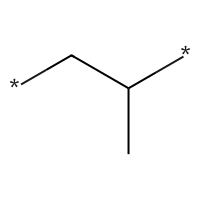

In [ ]:
smiles = "*CC(*)C"
mol = Chem.MolFromSmiles(smiles)
Draw.MolToImage(mol, kekulize=False, size=(200, 200))

## 4. Featurization, Model Training and Evaluation <a id="modeleval" />

With the required dataset loaded, we can proceed to train some models. Deepchem offers various models suitable for regression tasks in a molecular context. We have implemented a featurization mechanism, followed by model training, and recorded the training loss to validate the alignment of the data with the model.

The process of training each model is going be of following steps.
###### i. Set the featurizer
###### ii. Featurize the input values and combine the target to form a dataset / dataloader
###### iii. Configure the model
###### iv. Fit the model with the dataset / dataloader and record the training loss.

### i. Graph Convolution Neural Network (GCN) Bicerano seul

Graph Convolutional Neural Networks (GCNs) are particularly effective in molecular modeling, as they can directly operate on the graph structure of molecules. In the context of our study, GCNs can be employed to capture the intricate relationships between atoms and bonds, offering a powerful method for predicting the crystallization tendency of polymers.


In [ ]:
# setting up the featurizer
molgraph_conv_featurizer = MolGraphConvFeaturizer()


# featurizing and preparing the dataset
X_molgraph_conv = molgraph_conv_featurizer.featurize(bic["smiles"].values)
y_molgraph_conv = [float(i) for i in bic["value"].values]

molgraph_conv_dataset = dc.data.NumpyDataset(X_molgraph_conv, y_molgraph_conv)

metric = dc.metrics.Metric(dc.metrics.mean_squared_error)
losses_gcn, val_losses_gcn = [], []
# initializing the model class
GCN_MODEL_bic = dc.models.GCNModel(
    mode="regression",
    n_tasks=1,
    batch_size=10,
    learning_rate=0.004,
    num_conv=4,
    graph_conv_layers=[256, 256],
    predictor_hidden_feats=32,
    self_loop=False,
)

for n in range(32):
    l2_loss_GCN = GCN_MODEL_bic.fit(molgraph_conv_dataset, nb_epoch=1)
    losses_gcn.append(l2_loss_GCN)

In [ ]:
GCN_MODEL_bic.save_checkpoint(1,'/content/drive/MyDrive/data_deepchem/GCN_MODEL_bic.pth.tar')

In [ ]:
# setting up the featurizer
molgraph_conv_featurizer = MolGraphConvFeaturizer()


# featurizing and preparing the dataset
X_molgraph_conv = molgraph_conv_featurizer.featurize(bic_rereview["smiles"].values)
y_molgraph_conv = [float(i) for i in bic_rereview["value"].values]

molgraph_conv_dataset = dc.data.NumpyDataset(X_molgraph_conv, y_molgraph_conv)

metric = dc.metrics.Metric(dc.metrics.mean_squared_error)
losses_gcn, val_losses_gcn = [], []
# initializing the model class
GCN_MODEL_bic_rereview = dc.models.GCNModel(
    mode="regression",
    n_tasks=1,
    batch_size=10,
    learning_rate=0.004,
    num_conv=4,
    graph_conv_layers=[256, 256],
    predictor_hidden_feats=32,
    self_loop=False,
)

for n in range(42):
    l2_loss_GCN = GCN_MODEL_bic_rereview.fit(molgraph_conv_dataset, nb_epoch=1)
    losses_gcn.append(l2_loss_GCN)

In [ ]:
GCN_MODEL_bic_rereview.save_checkpoint(1,'/content/drive/MyDrive/data_deepchem/GCN_MODEL_bic_rereview.pth.tar')

In [ ]:
# setting up the featurizer
molgraph_conv_featurizer = MolGraphConvFeaturizer()


# featurizing and preparing the dataset
X_molgraph_conv = molgraph_conv_featurizer.featurize(bic_rereview_polyinfo10["smiles"].values)
y_molgraph_conv = [float(i) for i in bic_rereview_polyinfo10["value"].values]

molgraph_conv_dataset = dc.data.NumpyDataset(X_molgraph_conv, y_molgraph_conv)

metric = dc.metrics.Metric(dc.metrics.mean_squared_error)
losses_gcn, val_losses_gcn = [], []
# initializing the model class
GCN_MODEL_bic_rereview_polyinfo10 = dc.models.GCNModel(
    mode="regression",
    n_tasks=1,
    batch_size=10,
    learning_rate=0.004,
    num_conv=4,
    graph_conv_layers=[256, 256],
    predictor_hidden_feats=32,
    self_loop=False,
)

for n in range(124):
    l2_loss_GCN = GCN_MODEL_bic_rereview_polyinfo10.fit(molgraph_conv_dataset, nb_epoch=1)
    losses_gcn.append(l2_loss_GCN)

In [ ]:
GCN_MODEL_bic_rereview_polyinfo10.save_checkpoint(1,'/content/drive/MyDrive/data_deepchem/GCN_MODEL_bic_rereview_polyinfo10.pth.tar')

In [ ]:
# setting up the featurizer
molgraph_conv_featurizer = MolGraphConvFeaturizer()


# featurizing and preparing the dataset
X_molgraph_conv = molgraph_conv_featurizer.featurize(bic_rereview_polyinfo20["smiles"].values)
y_molgraph_conv = [float(i) for i in bic_rereview_polyinfo20["value"].values]

molgraph_conv_dataset = dc.data.NumpyDataset(X_molgraph_conv, y_molgraph_conv)

metric = dc.metrics.Metric(dc.metrics.mean_squared_error)
losses_gcn, val_losses_gcn = [], []
# initializing the model class
GCN_MODEL_bic_rereview_polyinfo20 = dc.models.GCNModel(
    mode="regression",
    n_tasks=1,
    batch_size=10,
    learning_rate=0.004,
    num_conv=4,
    graph_conv_layers=[256, 256],
    predictor_hidden_feats=32,
    self_loop=False,
)

for n in range(206):
    l2_loss_GCN = GCN_MODEL_bic_rereview_polyinfo20.fit(molgraph_conv_dataset, nb_epoch=1)
    losses_gcn.append(l2_loss_GCN)

In [ ]:
GCN_MODEL_bic_rereview_polyinfo20.save_checkpoint(1,'/content/drive/MyDrive/data_deepchem/GCN_MODEL_bic_rereview_polyinfo20.pth.tar')

In [ ]:
# setting up the featurizer
molgraph_conv_featurizer = MolGraphConvFeaturizer()


# featurizing and preparing the dataset
X_molgraph_conv = molgraph_conv_featurizer.featurize(bic_rereview_polyinfo30["smiles"].values)
y_molgraph_conv = [float(i) for i in bic_rereview_polyinfo30["value"].values]

molgraph_conv_dataset = dc.data.NumpyDataset(X_molgraph_conv, y_molgraph_conv)

metric = dc.metrics.Metric(dc.metrics.mean_squared_error)
losses_gcn, val_losses_gcn = [], []
# initializing the model class
GCN_MODEL_bic_rereview_polyinfo30 = dc.models.GCNModel(
    mode="regression",
    n_tasks=1,
    batch_size=10,
    learning_rate=0.004,
    num_conv=4,
    graph_conv_layers=[256, 256],
    predictor_hidden_feats=32,
    self_loop=False,
)

for n in range(288):
    l2_loss_GCN = GCN_MODEL_bic_rereview_polyinfo30.fit(molgraph_conv_dataset, nb_epoch=1)
    losses_gcn.append(l2_loss_GCN)

In [ ]:
GCN_MODEL_bic_rereview_polyinfo30.save_checkpoint(1,'/content/drive/MyDrive/data_deepchem/GCN_MODEL_bic_rereview_polyinfo30.pth.tar')

In [ ]:
# setting up the featurizer
molgraph_conv_featurizer = MolGraphConvFeaturizer()


# featurizing and preparing the dataset
X_molgraph_conv = molgraph_conv_featurizer.featurize(bic_rereview_polyinfo40["smiles"].values)
y_molgraph_conv = [float(i) for i in bic_rereview_polyinfo40["value"].values]

molgraph_conv_dataset = dc.data.NumpyDataset(X_molgraph_conv, y_molgraph_conv)

metric = dc.metrics.Metric(dc.metrics.mean_squared_error)
losses_gcn, val_losses_gcn = [], []
# initializing the model class
GCN_MODEL_bic_rereview_polyinfo40 = dc.models.GCNModel(
    mode="regression",
    n_tasks=1,
    batch_size=10,
    learning_rate=0.004,
    num_conv=4,
    graph_conv_layers=[256, 256],
    predictor_hidden_feats=32,
    self_loop=False,
)

for n in range(368):
    l2_loss_GCN = GCN_MODEL_bic_rereview_polyinfo40.fit(molgraph_conv_dataset, nb_epoch=1)
    losses_gcn.append(l2_loss_GCN)

In [ ]:
GCN_MODEL_bic_rereview_polyinfo40.save_checkpoint(1,'/content/drive/MyDrive/data_deepchem/GCN_MODEL_bic_rereview_polyinfo40.pth.tar')

In [ ]:
# setting up the featurizer
molgraph_conv_featurizer = MolGraphConvFeaturizer()


# featurizing and preparing the dataset
X_molgraph_conv = molgraph_conv_featurizer.featurize(bic_rereview_polyinfo100["smiles"].values)
y_molgraph_conv = [float(i) for i in bic_rereview_polyinfo100["value"].values]

molgraph_conv_dataset = dc.data.NumpyDataset(X_molgraph_conv, y_molgraph_conv)

metric = dc.metrics.Metric(dc.metrics.mean_squared_error)
losses_gcn, val_losses_gcn = [], []
# initializing the model class
GCN_MODEL_bic_rereview_polyinfo100= dc.models.GCNModel(
    mode="regression",
    n_tasks=1,
    batch_size=10,
    learning_rate=0.004,
    num_conv=4,
    graph_conv_layers=[256, 256],
    predictor_hidden_feats=32,
    self_loop=False,
)

for n in range(858):
    l2_loss_GCN = GCN_MODEL_bic_rereview_polyinfo100.fit(molgraph_conv_dataset, nb_epoch=1)
    losses_gcn.append(l2_loss_GCN)

In [ ]:
GCN_MODEL_bic_rereview_polyinfo100.save_checkpoint(1,'/content/drive/MyDrive/data_deepchem/GCN_MODEL_bic_rereview_polyinfo100.pth.tar')

### ii. Directed Message Passing Neural Network (D-MPNN)

Directed Message Passing Neural Networks (D-MPNNs) offer a sophisticated approach for molecular modeling by explicitly passing messages between atoms to capture the detailed structure of the molecule. In our study, D-MPNNs are used to predict the crystallization tendency of polymers. These networks operate by iteratively updating atom representations based on their neighbors, effectively capturing both local and global structural information. This method allows for precise modeling of the complex interactions within the molecular graph, leading to improved prediction accuracy.

In [ ]:
# setting up the featurizer
dmpnn_featurizer = dc.feat.DMPNNFeaturizer()

# featurizing and preparing the dataset
dmpnn_loader = dc.data.CSVLoader(tasks=['value'], feature_field='smiles', featurizer=dmpnn_featurizer)
dmpnn_dataset = dmpnn_loader.create_dataset('./bicerano.csv')
metric = dc.metrics.Metric(dc.metrics.mean_squared_error)

losses_dmpnn, val_losses_dmpnn = [], []

# initializing the model class
dmpnn_model_bic = dc.models.torch_models.DMPNNModel(batch_size=10,enc_hidden=300,depth=3,enc_activation='relu',ffn_hidden=300,ffn_layers=4,aggregation='mean',ffn_activation='relu')

for n in range(32):
    dmpnn_loss = dmpnn_model_bic.fit(dmpnn_dataset, nb_epoch=1)
    losses_dmpnn.append(dmpnn_loss)

dmpnn_model_bic.save_checkpoint(1,'/content/drive/MyDrive/data_deepchem/dmpnn_model_bic.pth.tar')

In [ ]:
# setting up the featurizer
dmpnn_featurizer = dc.feat.DMPNNFeaturizer()

# featurizing and preparing the dataset
dmpnn_loader = dc.data.CSVLoader(tasks=['value'], feature_field='smiles', featurizer=dmpnn_featurizer)
dmpnn_dataset = dmpnn_loader.create_dataset('./bicerano_rereview.csv')
metric = dc.metrics.Metric(dc.metrics.mean_squared_error)

losses_dmpnn, val_losses_dmpnn = [], []

# initializing the model class
dmpnn_model_bic_rereview = dc.models.torch_models.DMPNNModel(batch_size=10,enc_hidden=300,depth=3,enc_activation='relu',ffn_hidden=300,ffn_layers=4,aggregation='mean',ffn_activation='relu')

for n in range(42):
    dmpnn_loss = dmpnn_model_bic_rereview.fit(dmpnn_dataset, nb_epoch=1)
    losses_dmpnn.append(dmpnn_loss)

dmpnn_model_bic_rereview.save_checkpoint(1,'/content/drive/MyDrive/data_deepchem/dmpnn_model_bic_rereview.pth.tar')

In [ ]:
# setting up the featurizer
dmpnn_featurizer = dc.feat.DMPNNFeaturizer()

# featurizing and preparing the dataset
dmpnn_loader = dc.data.CSVLoader(tasks=['value'], feature_field='smiles', featurizer=dmpnn_featurizer)
dmpnn_dataset = dmpnn_loader.create_dataset('./bicerano_rereview_polyinfo10.csv')
metric = dc.metrics.Metric(dc.metrics.mean_squared_error)

losses_dmpnn, val_losses_dmpnn = [], []

# initializing the model class
dmpnn_model_bic_rereview_polyinfo10 = dc.models.torch_models.DMPNNModel(batch_size=10,enc_hidden=300,depth=3,enc_activation='relu',ffn_hidden=300,ffn_layers=4,aggregation='mean',ffn_activation='relu')

for n in range(124):
    dmpnn_loss = dmpnn_model_bic_rereview_polyinfo10.fit(dmpnn_dataset, nb_epoch=1)
    losses_dmpnn.append(dmpnn_loss)

dmpnn_model_bic_rereview_polyinfo10.save_checkpoint(1,'/content/drive/MyDrive/data_deepchem/dmpnn_model_bic_rereview_polyinfo10.pth.tar')



In [ ]:
# setting up the featurizer
dmpnn_featurizer = dc.feat.DMPNNFeaturizer()

# featurizing and preparing the dataset
dmpnn_loader = dc.data.CSVLoader(tasks=['value'], feature_field='smiles', featurizer=dmpnn_featurizer)
dmpnn_dataset = dmpnn_loader.create_dataset('./bicerano_rereview_polyinfo20.csv')
metric = dc.metrics.Metric(dc.metrics.mean_squared_error)

losses_dmpnn, val_losses_dmpnn = [], []

# initializing the model class
dmpnn_model_bic_rereview_polyinfo20 = dc.models.torch_models.DMPNNModel(batch_size=10,enc_hidden=300,depth=3,enc_activation='relu',ffn_hidden=300,ffn_layers=4,aggregation='mean',ffn_activation='relu')

for n in range(205):
    dmpnn_loss = dmpnn_model_bic_rereview_polyinfo20.fit(dmpnn_dataset, nb_epoch=1)
    losses_dmpnn.append(dmpnn_loss)

dmpnn_model_bic_rereview_polyinfo20.save_checkpoint(1,'/content/drive/MyDrive/data_deepchem/dmpnn_model_bic_rereview_polyinfo20.pth.tar')



In [ ]:
# setting up the featurizer
dmpnn_featurizer = dc.feat.DMPNNFeaturizer()

# featurizing and preparing the dataset
dmpnn_loader = dc.data.CSVLoader(tasks=['value'], feature_field='smiles', featurizer=dmpnn_featurizer)
dmpnn_dataset = dmpnn_loader.create_dataset('./bicerano_rereview_polyinfo30.csv')
metric = dc.metrics.Metric(dc.metrics.mean_squared_error)

losses_dmpnn, val_losses_dmpnn = [], []

# initializing the model class
dmpnn_model_bic_rereview_polyinfo30 = dc.models.torch_models.DMPNNModel(batch_size=10,enc_hidden=300,depth=3,enc_activation='relu',ffn_hidden=300,ffn_layers=4,aggregation='mean',ffn_activation='relu')

for n in range(287):
    dmpnn_loss = dmpnn_model_bic_rereview_polyinfo30.fit(dmpnn_dataset, nb_epoch=1)
    losses_dmpnn.append(dmpnn_loss)

dmpnn_model_bic_rereview_polyinfo30.save_checkpoint(1,'/content/drive/MyDrive/data_deepchem/dmpnn_model_bic_rereview_polyinfo30.pth.tar')



In [ ]:
# setting up the featurizer
dmpnn_featurizer = dc.feat.DMPNNFeaturizer()

# featurizing and preparing the dataset
dmpnn_loader = dc.data.CSVLoader(tasks=['value'], feature_field='smiles', featurizer=dmpnn_featurizer)
dmpnn_dataset = dmpnn_loader.create_dataset('./bicerano_rereview_polyinfo40.csv')
metric = dc.metrics.Metric(dc.metrics.mean_squared_error)

losses_dmpnn, val_losses_dmpnn = [], []

# initializing the model class
dmpnn_model_bic_rereview_polyinfo40 = dc.models.torch_models.DMPNNModel(batch_size=10,enc_hidden=300,depth=3,enc_activation='relu',ffn_hidden=300,ffn_layers=4,aggregation='mean',ffn_activation='relu')

for n in range(368):
    dmpnn_loss = dmpnn_model_bic_rereview_polyinfo40.fit(dmpnn_dataset, nb_epoch=1)
    losses_dmpnn.append(dmpnn_loss)

dmpnn_model_bic_rereview_polyinfo40.save_checkpoint(1,'/content/drive/MyDrive/data_deepchem/dmpnn_model_bic_rereview_polyinfo40.pth.tar')



In [ ]:
# setting up the featurizer
dmpnn_featurizer = dc.feat.DMPNNFeaturizer()

# featurizing and preparing the dataset
dmpnn_loader = dc.data.CSVLoader(tasks=['value'], feature_field='smiles', featurizer=dmpnn_featurizer)
dmpnn_dataset = dmpnn_loader.create_dataset('./bicerano_rereview_polyinfo100.csv')
metric = dc.metrics.Metric(dc.metrics.mean_squared_error)

losses_dmpnn, val_losses_dmpnn = [], []

# initializing the model class
dmpnn_model_bic_rereview_polyinfo100 = dc.models.torch_models.DMPNNModel(batch_size=10,enc_hidden=300,depth=3,enc_activation='relu',ffn_hidden=300,ffn_layers=4,aggregation='mean',ffn_activation='relu')

for n in range(858):
    dmpnn_loss = dmpnn_model_bic_rereview_polyinfo100.fit(dmpnn_dataset, nb_epoch=1)
    losses_dmpnn.append(dmpnn_loss)

dmpnn_model_bic_rereview_polyinfo100.save_checkpoint(1,'/content/drive/MyDrive/data_deepchem/dmpnn_model_bic_rereview_polyinfo100.pth.tar')



#### Evaluation Analysis

## 5. Comparing the two ML models with P3C

We will use the Tao Dataset to compare the performance of the 2 ML models and P3C.

#Prediction grande DB GCN

In [ ]:
GCN_MODEL_bic=dc.models.GCNModel(mode="regression",n_tasks=1,batch_size=10,learning_rate=0.004,num_conv=4,graph_conv_layers=[256, 256],predictor_hidden_feats=32,self_loop=False)
GCN_MODEL_bic_rereview=dc.models.GCNModel(mode="regression",n_tasks=1,batch_size=10,learning_rate=0.004,num_conv=4,graph_conv_layers=[256, 256],predictor_hidden_feats=32,self_loop=False)
GCN_MODEL_bic_rereview_polyinfo10=dc.models.GCNModel(mode="regression",n_tasks=1,batch_size=10,learning_rate=0.004,num_conv=4,graph_conv_layers=[256, 256],predictor_hidden_feats=32,self_loop=False)
GCN_MODEL_bic_rereview_polyinfo20=dc.models.GCNModel(mode="regression",n_tasks=1,batch_size=10,learning_rate=0.004,num_conv=4,graph_conv_layers=[256, 256],predictor_hidden_feats=32,self_loop=False)
GCN_MODEL_bic_rereview_polyinfo30=dc.models.GCNModel(mode="regression",n_tasks=1,batch_size=10,learning_rate=0.004,num_conv=4,graph_conv_layers=[256, 256],predictor_hidden_feats=32,self_loop=False)
GCN_MODEL_bic_rereview_polyinfo40=dc.models.GCNModel(mode="regression",n_tasks=1,batch_size=10,learning_rate=0.004,num_conv=4,graph_conv_layers=[256, 256],predictor_hidden_feats=32,self_loop=False)
GCN_MODEL_bic_rereview_polyinfo100=dc.models.GCNModel(mode="regression",n_tasks=1,batch_size=10,learning_rate=0.004,num_conv=4,graph_conv_layers=[256, 256],predictor_hidden_feats=32,self_loop=False)
GCN_MODEL_bic.restore('/content/drive/MyDrive/data_deepchem/GCN_MODEL_bic.pth.tar/checkpoint1.pt')
GCN_MODEL_bic_rereview.restore('/content/drive/MyDrive/data_deepchem/GCN_MODEL_bic_rereview.pth.tar/checkpoint1.pt')
GCN_MODEL_bic_rereview_polyinfo10.restore('/content/drive/MyDrive/data_deepchem/GCN_MODEL_bic_rereview_polyinfo10.pth.tar/checkpoint1.pt')
GCN_MODEL_bic_rereview_polyinfo20.restore('/content/drive/MyDrive/data_deepchem/GCN_MODEL_bic_rereview_polyinfo20.pth.tar/checkpoint1.pt')
GCN_MODEL_bic_rereview_polyinfo30.restore('/content/drive/MyDrive/data_deepchem/GCN_MODEL_bic_rereview_polyinfo30.pth.tar/checkpoint1.pt')
GCN_MODEL_bic_rereview_polyinfo40.restore('/content/drive/MyDrive/data_deepchem/GCN_MODEL_bic_rereview_polyinfo40.pth.tar/checkpoint1.pt')
GCN_MODEL_bic_rereview_polyinfo100.restore('/content/drive/MyDrive/data_deepchem/GCN_MODEL_bic_rereview_polyinfo100.pth.tar/checkpoint1.pt')

In [ ]:
y_Big_Db = [float(i) for i in Tg_Big_Db["Tg"].values]
P3C_Big_Db=[float(i) for i in Tg_Big_Db["P3C"].values]

#mpnn_loader = dc.data.CSVLoader(tasks=['Tg'], feature_field='SMILES', featurizer=dmpnn_featurizer)

molgraph_conv_featurizer = MolGraphConvFeaturizer()

#featurize GCN
X_Big_Db_molgraph_conv = molgraph_conv_featurizer.featurize(Tg_Big_Db["SMILES"].values)
Big_Db_molgraph_conv_dataset = dc.data.NumpyDataset(X_Big_Db_molgraph_conv, y_Big_Db)

#featurize DMPNN
#Big_Db_dmpnn_dataset = dmpnn_loader.create_dataset("Big_Db.csv")

#prediction GNN
Big_Db_prediction_GCN_bic=GCN_MODEL_bic.predict_on_batch(X_Big_Db_molgraph_conv)
#Big_Db_prediction_dmpnn=dmpnn_model.predict(Big_Db_dmpnn_dataset)
Big_Db_prediction_GCN_bic_rereview=GCN_MODEL_bic_rereview.predict_on_batch(X_Big_Db_molgraph_conv)
Big_Db_prediction_GCN_bic_rereview_polyinfo10=GCN_MODEL_bic_rereview_polyinfo10.predict_on_batch(X_Big_Db_molgraph_conv)
Big_Db_prediction_GCN_bic_rereview_polyinfo20=GCN_MODEL_bic_rereview_polyinfo20.predict_on_batch(X_Big_Db_molgraph_conv)
Big_Db_prediction_GCN_bic_rereview_polyinfo30=GCN_MODEL_bic_rereview_polyinfo30.predict_on_batch(X_Big_Db_molgraph_conv)
Big_Db_prediction_GCN_bic_rereview_polyinfo40=GCN_MODEL_bic_rereview_polyinfo40.predict_on_batch(X_Big_Db_molgraph_conv)
Big_Db_prediction_GCN_bic_rereview_polyinfo100=GCN_MODEL_bic_rereview_polyinfo100.predict_on_batch(X_Big_Db_molgraph_conv)

#R2 score, PEARSON
r2_GCN_bic=r2_score(y_Big_Db, Big_Db_prediction_GCN_bic)
#r2_dmpnn=r2_score(y_Big_Db, Big_Db_prediction_dmpnn)
r2_P3C=r2_score(y_Big_Db, P3C_Big_Db)
r2_GCN_bic_rereview=r2_score(y_Big_Db, Big_Db_prediction_GCN_bic_rereview)
r2_GCN_bic_rereview_polyinfo10=r2_score(y_Big_Db, Big_Db_prediction_GCN_bic_rereview_polyinfo10)
r2_GCN_bic_rereview_polyinfo20=r2_score(y_Big_Db, Big_Db_prediction_GCN_bic_rereview_polyinfo20)
r2_GCN_bic_rereview_polyinfo30=r2_score(y_Big_Db, Big_Db_prediction_GCN_bic_rereview_polyinfo30)
r2_GCN_bic_rereview_polyinfo40=r2_score(y_Big_Db, Big_Db_prediction_GCN_bic_rereview_polyinfo40)
r2_GCN_bic_rereview_polyinfo100=r2_score(y_Big_Db, Big_Db_prediction_GCN_bic_rereview_polyinfo100)
print("\nR2 SCORE")
print("R2 score GCN :",  r2_GCN_bic,r2_GCN_bic_rereview,r2_GCN_bic_rereview_polyinfo10,r2_GCN_bic_rereview_polyinfo20,r2_GCN_bic_rereview_polyinfo30,r2_GCN_bic_rereview_polyinfo40,r2_GCN_bic_rereview_polyinfo100)
#print("R2 score DMPNN :",  r2_dmpnn)
print("R2 score P3C :",  r2_P3C)
r2_GCN=[r2_GCN_bic,r2_GCN_bic_rereview,r2_GCN_bic_rereview_polyinfo10,r2_GCN_bic_rereview_polyinfo20,r2_GCN_bic_rereview_polyinfo30,r2_GCN_bic_rereview_polyinfo40,r2_GCN_bic_rereview_polyinfo100]

#MEAN SQUARED ERROR
print("\nMSE SCORE")
mse_GCN_bic=mean_squared_error(y_Big_Db, Big_Db_prediction_GCN_bic)
mse_GCN_bic_rereview=mean_squared_error(y_Big_Db, Big_Db_prediction_GCN_bic_rereview)
mse_GCN_bic_rereview_polyinfo10=mean_squared_error(y_Big_Db, Big_Db_prediction_GCN_bic_rereview_polyinfo10)
mse_GCN_bic_rereview_polyinfo20=mean_squared_error(y_Big_Db, Big_Db_prediction_GCN_bic_rereview_polyinfo20)
mse_GCN_bic_rereview_polyinfo30=mean_squared_error(y_Big_Db, Big_Db_prediction_GCN_bic_rereview_polyinfo30)
mse_GCN_bic_rereview_polyinfo40=mean_squared_error(y_Big_Db, Big_Db_prediction_GCN_bic_rereview_polyinfo40)
mse_GCN_bic_rereview_polyinfo100=mean_squared_error(y_Big_Db, Big_Db_prediction_GCN_bic_rereview_polyinfo100)
#mse_dmpnn=mean_squared_error(y_Big_Db, Big_Db_prediction_dmpnn)
mse_P3C=mean_squared_error(y_Big_Db, P3C_Big_Db)
print("MSE GCN :",  mse_GCN_bic,mse_GCN_bic_rereview,mse_GCN_bic_rereview_polyinfo10,mse_GCN_bic_rereview_polyinfo20,mse_GCN_bic_rereview_polyinfo30,mse_GCN_bic_rereview_polyinfo40,mse_GCN_bic_rereview_polyinfo100)
#print("MSE DMPNN :",  mse_dmpnn)
print("MSE P3C :",  mse_P3C)
MSE_GCN=[mse_GCN_bic,mse_GCN_bic_rereview,mse_GCN_bic_rereview_polyinfo10,mse_GCN_bic_rereview_polyinfo20,mse_GCN_bic_rereview_polyinfo30,mse_GCN_bic_rereview_polyinfo40,mse_GCN_bic_rereview_polyinfo100]

#MEAN ABSOLUTE ERROR
print("\nMAE SCORE")
mae_GCN_bic=mean_absolute_error(y_Big_Db, Big_Db_prediction_GCN_bic)
mae_GCN_bic_rereview=mean_absolute_error(y_Big_Db, Big_Db_prediction_GCN_bic_rereview)
mae_GCN_bic_rereview_polyinfo10=mean_absolute_error(y_Big_Db, Big_Db_prediction_GCN_bic_rereview_polyinfo10)
mae_GCN_bic_rereview_polyinfo20=mean_absolute_error(y_Big_Db, Big_Db_prediction_GCN_bic_rereview_polyinfo20)
mae_GCN_bic_rereview_polyinfo30=mean_absolute_error(y_Big_Db, Big_Db_prediction_GCN_bic_rereview_polyinfo30)
mae_GCN_bic_rereview_polyinfo40=mean_absolute_error(y_Big_Db, Big_Db_prediction_GCN_bic_rereview_polyinfo40)
mae_GCN_bic_rereview_polyinfo100=mean_absolute_error(y_Big_Db, Big_Db_prediction_GCN_bic_rereview_polyinfo100)
#mae_dmpnn=mean_absolute_error(y_Big_Db, Big_Db_prediction_dmpnn)
mae_P3C=mean_absolute_error(y_Big_Db, P3C_Big_Db)
print("MAE GCN :",  mae_GCN_bic,mae_GCN_bic_rereview,mae_GCN_bic_rereview_polyinfo10,mae_GCN_bic_rereview_polyinfo20,mae_GCN_bic_rereview_polyinfo30,mae_GCN_bic_rereview_polyinfo40,mae_GCN_bic_rereview_polyinfo100)
#print("MAE DMPNN :",  mae_dmpnn)
print("MAE P3C :", mae_P3C)
MAE_GCN=[mae_GCN_bic,mae_GCN_bic_rereview,mae_GCN_bic_rereview_polyinfo10,mae_GCN_bic_rereview_polyinfo20,mae_GCN_bic_rereview_polyinfo30,mae_GCN_bic_rereview_polyinfo40,mae_GCN_bic_rereview_polyinfo100]

print(MAE_GCN)

#MEAN ABSOLUTE PERCENTAGE ERROR
print("\nMAPE SCORE")
mape_GCN_bic=mean_absolute_percentage_error(y_Big_Db, Big_Db_prediction_GCN_bic)
mape_GCN_bic_rereview=mean_absolute_percentage_error(y_Big_Db, Big_Db_prediction_GCN_bic_rereview)
mape_GCN_bic_rereview_polyinfo10=mean_absolute_percentage_error(y_Big_Db, Big_Db_prediction_GCN_bic_rereview_polyinfo10)
mape_GCN_bic_rereview_polyinfo20=mean_absolute_percentage_error(y_Big_Db, Big_Db_prediction_GCN_bic_rereview_polyinfo20)
mape_GCN_bic_rereview_polyinfo30=mean_absolute_percentage_error(y_Big_Db, Big_Db_prediction_GCN_bic_rereview_polyinfo30)
mape_GCN_bic_rereview_polyinfo40=mean_absolute_percentage_error(y_Big_Db, Big_Db_prediction_GCN_bic_rereview_polyinfo40)
mape_GCN_bic_rereview_polyinfo100=mean_absolute_percentage_error(y_Big_Db, Big_Db_prediction_GCN_bic_rereview_polyinfo100)
#mape_dmpnn=mean_absolute_percentage_error(y_Big_Db, Big_Db_prediction_dmpnn)
mape_P3C=mean_absolute_percentage_error(y_Big_Db, P3C_Big_Db)
print("MAPE GCN :",  mape_GCN_bic,mape_GCN_bic_rereview,mape_GCN_bic_rereview_polyinfo10,mape_GCN_bic_rereview_polyinfo20,mape_GCN_bic_rereview_polyinfo30,mape_GCN_bic_rereview_polyinfo40,mape_GCN_bic_rereview_polyinfo100)
#print("MAPE DMPNN :",  mape_dmpnn)
print("MAPE P3C :",  mape_P3C)
MAPE_GCN=[mape_GCN_bic,mape_GCN_bic_rereview,mape_GCN_bic_rereview_polyinfo10,mape_GCN_bic_rereview_polyinfo20,mape_GCN_bic_rereview_polyinfo30,mape_GCN_bic_rereview_polyinfo40,mape_GCN_bic_rereview_polyinfo100]




R2 SCORE
R2 score GCN : 0.7519888877868652 0.7822281122207642 0.8497663736343384 0.8730872869491577 0.8837990164756775 0.8589396476745605 0.9001907110214233
R2 score P3C : 0.8167924616194108

MSE SCORE
MSE GCN : 3746.906679602344 3290.058317726373 2269.702127364513 1917.3742682546292 1755.543302161385 2131.114566971519 1507.9011171428392
MSE P3C : 2767.866573962788

MAE SCORE
MAE GCN : 47.54375344875376 42.184511160895404 35.399162323681495 29.230604985579774 28.519465237536703 33.81088987098504 24.94715845114842
MAE P3C : 38.473672606037
[47.54375344875376, 42.184511160895404, 35.399162323681495, 29.230604985579774, 28.519465237536703, 33.81088987098504, 24.94715845114842]

MAPE SCORE
MAPE GCN : 0.11240089988523702 0.09918144088225543 0.08548564844008189 0.0673927164322438 0.06484211523991604 0.08543590415361192 0.05735316406808825
MAPE P3C : 0.09133300011024463


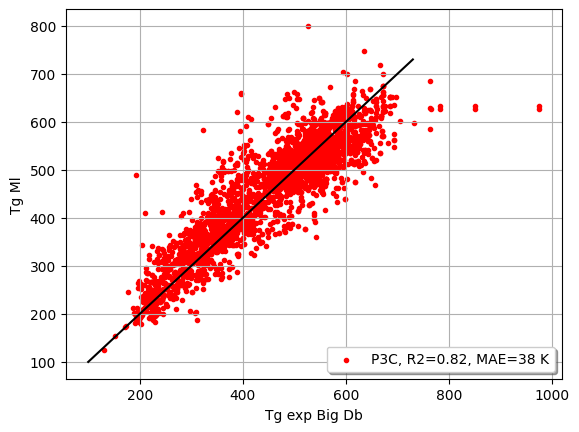

In [ ]:
# fig, axs = plt.subplots(2)
# fig.suptitle('Vertically stacked subplots')
# axs[0].plot(x, y)
# axs[1].plot(x, -y)


fig, ax = plt.subplots(1)

plt.xlabel('Tg exp Big Db')
plt.ylabel('Tg Ml')






# line2 = ax.scatter(y_Big_Db, Big_Db_prediction_GCN_bic, label='bic', color='blue', marker='.')
# line3 = ax.scatter(y_Big_Db, Big_Db_prediction_GCN_bic_rereview, label='bic+rrw', color='red', marker='.')
# line4 = ax.scatter(y_Big_Db, Big_Db_prediction_GCN_bic_rereview_polyinfo10, label='bic+rrw+polyI10%', color='green', marker='.')
# line5 = ax.scatter(y_Big_Db, Big_Db_prediction_GCN_bic_rereview_polyinfo20, label='bic+rrw+polyI20%', color='orange', marker='.')
# line6 = ax.scatter(y_Big_Db, Big_Db_prediction_GCN_bic_rereview_polyinfo30, label='bic+rrw+polyI30%', color='purple', marker='.')
# line7 = ax.scatter(y_Big_Db, Big_Db_prediction_GCN_bic_rereview_polyinfo40, label='bic+rrw+polyI40%', color='black', marker='.')
# line9 = ax.scatter(y_Big_Db, Big_Db_prediction_GCN_bic_rereview_polyinfo100, label='bic+rrw+polyI100%', color='yellow', marker='.')

legend = ax.legend(loc='lower right', shadow=True)


plt.grid(True)
plt.show()


In [ ]:
fig, ax1=plt.subplots()
line1 = ax1.scatter(size_training_DB[0:6]+[size_training_DB[-1]],MAE_GCN)
plt.xlabel('Training size')
plt.ylabel('MAE')
plt.title('MAE vs Training size')
plt.grid(True)

NameError: name 'plt' is not defined

# Prediction Big DB dmpnn

In [ ]:
dmpnn_model_bic = dc.models.torch_models.DMPNNModel(batch_size=10,enc_hidden=300,depth=3,enc_activation='relu',ffn_hidden=300,ffn_layers=4,aggregation='mean',ffn_activation='relu')
dmpnn_model_bic_rereview = dc.models.torch_models.DMPNNModel(batch_size=10,enc_hidden=300,depth=3,enc_activation='relu',ffn_hidden=300,ffn_layers=4,aggregation='mean',ffn_activation='relu')
dmpnn_model_bic_rereview_polyinfo10 = dc.models.torch_models.DMPNNModel(batch_size=10,enc_hidden=300,depth=3,enc_activation='relu',ffn_hidden=300,ffn_layers=4,aggregation='mean',ffn_activation='relu')
dmpnn_model_bic_rereview_polyinfo20 = dc.models.torch_models.DMPNNModel(batch_size=10,enc_hidden=300,depth=3,enc_activation='relu',ffn_hidden=300,ffn_layers=4,aggregation='mean',ffn_activation='relu')
dmpnn_model_bic_rereview_polyinfo30 = dc.models.torch_models.DMPNNModel(batch_size=10,enc_hidden=300,depth=3,enc_activation='relu',ffn_hidden=300,ffn_layers=4,aggregation='mean',ffn_activation='relu')
dmpnn_model_bic_rereview_polyinfo40 = dc.models.torch_models.DMPNNModel(batch_size=10,enc_hidden=300,depth=3,enc_activation='relu',ffn_hidden=300,ffn_layers=4,aggregation='mean',ffn_activation='relu')
dmpnn_model_bic_rereview_polyinfo100 = dc.models.torch_models.DMPNNModel(batch_size=10,enc_hidden=300,depth=3,enc_activation='relu',ffn_hidden=300,ffn_layers=4,aggregation='mean',ffn_activation='relu')
dmpnn_model_bic.restore('/content/drive/MyDrive/data_deepchem/dmpnn_model_bic.pth.tar/checkpoint1.pt')
dmpnn_model_bic_rereview.restore('/content/drive/MyDrive/data_deepchem/dmpnn_model_bic_rereview.pth.tar/checkpoint1.pt')
dmpnn_model_bic_rereview_polyinfo10.restore('/content/drive/MyDrive/data_deepchem/dmpnn_model_bic_rereview_polyinfo10.pth.tar/checkpoint1.pt')
dmpnn_model_bic_rereview_polyinfo20.restore('/content/drive/MyDrive/data_deepchem/dmpnn_model_bic_rereview_polyinfo20.pth.tar/checkpoint1.pt')
dmpnn_model_bic_rereview_polyinfo30.restore('/content/drive/MyDrive/data_deepchem/dmpnn_model_bic_rereview_polyinfo30.pth.tar/checkpoint1.pt')
dmpnn_model_bic_rereview_polyinfo40.restore('/content/drive/MyDrive/data_deepchem/dmpnn_model_bic_rereview_polyinfo40.pth.tar/checkpoint1.pt')
dmpnn_model_bic_rereview_polyinfo100.restore('/content/drive/MyDrive/data_deepchem/dmpnn_model_bic_rereview_polyinfo100.pth.tar/checkpoint1.pt')


In [ ]:
y_Big_Db = [float(i) for i in Tg_Big_Db["Tg"].values]
P3C_Big_Db=[float(i) for i in Tg_Big_Db["P3C"].values]

dmpnn_featurizer = dc.feat.DMPNNFeaturizer()

dmpnn_loader = dc.data.CSVLoader(tasks=['Tg'], feature_field='SMILES', featurizer=dmpnn_featurizer)


#featurize DMPNN
Big_Db_dmpnn_dataset = dmpnn_loader.create_dataset("Big_Db.csv")

#prediction DMPNN
Big_Db_prediction_dmpnn_bic=dmpnn_model_bic.predict(Big_Db_dmpnn_dataset)
Big_Db_prediction_dmpnn_bic_rereview=dmpnn_model_bic_rereview.predict(Big_Db_dmpnn_dataset)
Big_Db_prediction_dmpnn_bic_rereview_polyinfo10=dmpnn_model_bic_rereview_polyinfo10.predict(Big_Db_dmpnn_dataset)
Big_Db_prediction_dmpnn_bic_rereview_polyinfo20=dmpnn_model_bic_rereview_polyinfo20.predict(Big_Db_dmpnn_dataset)
Big_Db_prediction_dmpnn_bic_rereview_polyinfo30=dmpnn_model_bic_rereview_polyinfo30.predict(Big_Db_dmpnn_dataset)
Big_Db_prediction_dmpnn_bic_rereview_polyinfo40=dmpnn_model_bic_rereview_polyinfo40.predict(Big_Db_dmpnn_dataset)
Big_Db_prediction_dmpnn_bic_rereview_polyinfo100=dmpnn_model_bic_rereview_polyinfo100.predict(Big_Db_dmpnn_dataset)


#R2 score, PEARSON
r2_dmpnn_bic=r2_score(y_Big_Db, Big_Db_prediction_dmpnn_bic)
#r2_dmpnn=r2_score(y_Big_Db, Big_Db_prediction_dmpnn)
r2_P3C=r2_score(y_Big_Db, P3C_Big_Db)
r2_dmpnn_bic_rereview=r2_score(y_Big_Db, Big_Db_prediction_dmpnn_bic_rereview)
r2_dmpnn_bic_rereview_polyinfo10=r2_score(y_Big_Db, Big_Db_prediction_dmpnn_bic_rereview_polyinfo10)
r2_dmpnn_bic_rereview_polyinfo20=r2_score(y_Big_Db, Big_Db_prediction_dmpnn_bic_rereview_polyinfo20)
r2_dmpnn_bic_rereview_polyinfo30=r2_score(y_Big_Db, Big_Db_prediction_dmpnn_bic_rereview_polyinfo30)
r2_dmpnn_bic_rereview_polyinfo40=r2_score(y_Big_Db, Big_Db_prediction_dmpnn_bic_rereview_polyinfo40)
r2_dmpnn_bic_rereview_polyinfo100=r2_score(y_Big_Db, Big_Db_prediction_dmpnn_bic_rereview_polyinfo100)
print("\nR2 SCORE")
print("R2 score dmpnn :",  r2_dmpnn_bic,r2_dmpnn_bic_rereview,r2_dmpnn_bic_rereview_polyinfo10,r2_dmpnn_bic_rereview_polyinfo20,r2_dmpnn_bic_rereview_polyinfo30,r2_dmpnn_bic_rereview_polyinfo40,r2_dmpnn_bic_rereview_polyinfo100)
#print("R2 score DMPNN :",  r2_dmpnn)
print("R2 score P3C :",  r2_P3C)
r2_dmpnn=[r2_dmpnn_bic,r2_dmpnn_bic_rereview,r2_dmpnn_bic_rereview_polyinfo10,r2_dmpnn_bic_rereview_polyinfo20,r2_dmpnn_bic_rereview_polyinfo30,r2_dmpnn_bic_rereview_polyinfo40,r2_dmpnn_bic_rereview_polyinfo100]

#MEAN SQUARED ERROR
print("\nMSE SCORE")
mse_dmpnn_bic=mean_squared_error(y_Big_Db, Big_Db_prediction_dmpnn_bic)
mse_dmpnn_bic_rereview=mean_squared_error(y_Big_Db, Big_Db_prediction_dmpnn_bic_rereview)
mse_dmpnn_bic_rereview_polyinfo10=mean_squared_error(y_Big_Db, Big_Db_prediction_dmpnn_bic_rereview_polyinfo10)
mse_dmpnn_bic_rereview_polyinfo20=mean_squared_error(y_Big_Db, Big_Db_prediction_dmpnn_bic_rereview_polyinfo20)
mse_dmpnn_bic_rereview_polyinfo30=mean_squared_error(y_Big_Db, Big_Db_prediction_dmpnn_bic_rereview_polyinfo30)
mse_dmpnn_bic_rereview_polyinfo40=mean_squared_error(y_Big_Db, Big_Db_prediction_dmpnn_bic_rereview_polyinfo40)
mse_dmpnn_bic_rereview_polyinfo100=mean_squared_error(y_Big_Db, Big_Db_prediction_dmpnn_bic_rereview_polyinfo100)
#mse_dmpnn=mean_squared_error(y_Big_Db, Big_Db_prediction_dmpnn)
mse_P3C=mean_squared_error(y_Big_Db, P3C_Big_Db)
print("MSE dmpnn :",  mse_dmpnn_bic,mse_dmpnn_bic_rereview,mse_dmpnn_bic_rereview_polyinfo10,mse_dmpnn_bic_rereview_polyinfo20,mse_dmpnn_bic_rereview_polyinfo30,mse_dmpnn_bic_rereview_polyinfo40,mse_dmpnn_bic_rereview_polyinfo100)
#print("MSE DMPNN :",  mse_dmpnn)
print("MSE P3C :",  mse_P3C)
MSE_dmpnn=[mse_dmpnn_bic,mse_dmpnn_bic_rereview,mse_dmpnn_bic_rereview_polyinfo10,mse_dmpnn_bic_rereview_polyinfo20,mse_dmpnn_bic_rereview_polyinfo30,mse_dmpnn_bic_rereview_polyinfo40,mse_dmpnn_bic_rereview_polyinfo100]

#MEAN ABSOLUTE ERROR
print("\nMAE SCORE")
mae_dmpnn_bic=mean_absolute_error(y_Big_Db, Big_Db_prediction_dmpnn_bic)
mae_dmpnn_bic_rereview=mean_absolute_error(y_Big_Db, Big_Db_prediction_dmpnn_bic_rereview)
mae_dmpnn_bic_rereview_polyinfo10=mean_absolute_error(y_Big_Db, Big_Db_prediction_dmpnn_bic_rereview_polyinfo10)
mae_dmpnn_bic_rereview_polyinfo20=mean_absolute_error(y_Big_Db, Big_Db_prediction_dmpnn_bic_rereview_polyinfo20)
mae_dmpnn_bic_rereview_polyinfo30=mean_absolute_error(y_Big_Db, Big_Db_prediction_dmpnn_bic_rereview_polyinfo30)
mae_dmpnn_bic_rereview_polyinfo40=mean_absolute_error(y_Big_Db, Big_Db_prediction_dmpnn_bic_rereview_polyinfo40)
mae_dmpnn_bic_rereview_polyinfo100=mean_absolute_error(y_Big_Db, Big_Db_prediction_dmpnn_bic_rereview_polyinfo100)
#mae_dmpnn=mean_absolute_error(y_Big_Db, Big_Db_prediction_dmpnn)
mae_P3C=mean_absolute_error(y_Big_Db, P3C_Big_Db)
print("MAE dmpnn :",  mae_dmpnn_bic,mae_dmpnn_bic_rereview,mae_dmpnn_bic_rereview_polyinfo10,mae_dmpnn_bic_rereview_polyinfo20,mae_dmpnn_bic_rereview_polyinfo30,mae_dmpnn_bic_rereview_polyinfo40,mae_dmpnn_bic_rereview_polyinfo100)
#print("MAE DMPNN :",  mae_dmpnn)
print("MAE P3C :", mae_P3C)
MAE_dmpnn=[mae_dmpnn_bic,mae_dmpnn_bic_rereview,mae_dmpnn_bic_rereview_polyinfo10,mae_dmpnn_bic_rereview_polyinfo20,mae_dmpnn_bic_rereview_polyinfo30,mae_dmpnn_bic_rereview_polyinfo40,mae_dmpnn_bic_rereview_polyinfo100]

print(MAE_dmpnn)

#MEAN ABSOLUTE PERCENTAGE ERROR
print("\nMAPE SCORE")
mape_dmpnn_bic=mean_absolute_percentage_error(y_Big_Db, Big_Db_prediction_dmpnn_bic)
mape_dmpnn_bic_rereview=mean_absolute_percentage_error(y_Big_Db, Big_Db_prediction_dmpnn_bic_rereview)
mape_dmpnn_bic_rereview_polyinfo10=mean_absolute_percentage_error(y_Big_Db, Big_Db_prediction_dmpnn_bic_rereview_polyinfo10)
mape_dmpnn_bic_rereview_polyinfo20=mean_absolute_percentage_error(y_Big_Db, Big_Db_prediction_dmpnn_bic_rereview_polyinfo20)
mape_dmpnn_bic_rereview_polyinfo30=mean_absolute_percentage_error(y_Big_Db, Big_Db_prediction_dmpnn_bic_rereview_polyinfo30)
mape_dmpnn_bic_rereview_polyinfo40=mean_absolute_percentage_error(y_Big_Db, Big_Db_prediction_dmpnn_bic_rereview_polyinfo40)
mape_dmpnn_bic_rereview_polyinfo100=mean_absolute_percentage_error(y_Big_Db, Big_Db_prediction_dmpnn_bic_rereview_polyinfo100)
#mape_dmpnn=mean_absolute_percentage_error(y_Big_Db, Big_Db_prediction_dmpnn)
mape_P3C=mean_absolute_percentage_error(y_Big_Db, P3C_Big_Db)
print("MAPE dmpnn :",  mape_dmpnn_bic,mape_dmpnn_bic_rereview,mape_dmpnn_bic_rereview_polyinfo10,mape_dmpnn_bic_rereview_polyinfo20,mape_dmpnn_bic_rereview_polyinfo30,mape_dmpnn_bic_rereview_polyinfo40,mape_dmpnn_bic_rereview_polyinfo100)
#print("MAPE DMPNN :",  mape_dmpnn)
print("MAPE P3C :",  mape_P3C)
MAPE_dmpnn=[mape_dmpnn_bic,mape_dmpnn_bic_rereview,mape_dmpnn_bic_rereview_polyinfo10,mape_dmpnn_bic_rereview_polyinfo20,mape_dmpnn_bic_rereview_polyinfo30,mape_dmpnn_bic_rereview_polyinfo40,mape_dmpnn_bic_rereview_polyinfo100]




R2 SCORE
R2 score dmpnn : 0.8252983093261719 0.8375234603881836 0.8941503763198853 0.8965080976486206 0.908669114112854 0.9144389629364014 0.9386574625968933
R2 score P3C : 0.8167924616194108

MSE SCORE
MSE dmpnn : 2639.361781797912 2454.6661616138513 1599.1566174699253 1563.5371183866591 1379.8106088453244 1292.6405395679092 926.7523050838873
MSE P3C : 2767.866573962788

MAE SCORE
MAE dmpnn : 37.55728910223922 35.653024465133136 26.95444256468974 25.78838009545494 23.895713981571465 22.48742462841654 17.237107389227827
MAE P3C : 38.473672606037
[37.55728910223922, 35.653024465133136, 26.95444256468974, 25.78838009545494, 23.895713981571465, 22.48742462841654, 17.237107389227827]

MAPE SCORE
MAPE dmpnn : 0.08495007941666863 0.085689076103819 0.06211776898556515 0.058216026504225325 0.05542302704401397 0.05187892921011336 0.040630432031610646
MAPE P3C : 0.09133300011024463


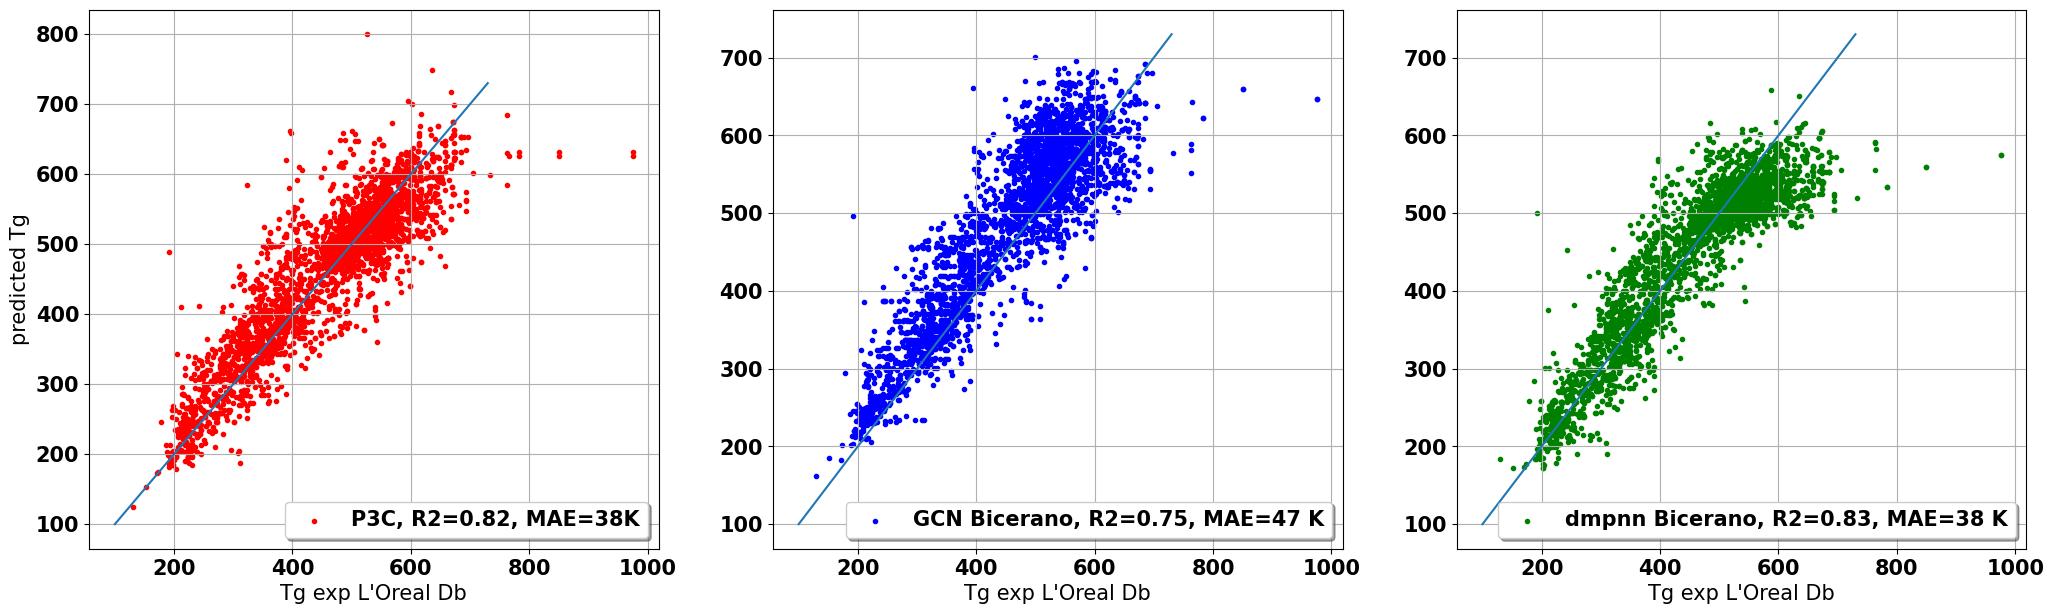

In [ ]:
font = {'family' : 'normal','weight' : 'bold','size': 15}

plt.rc('font', **font)

fig, ax = plt.subplots(1,3,  figsize=(25,7))

line1= ax[0].plot([100,730],[100,730])
line8 = ax[0].scatter(y_Big_Db, P3C_Big_Db, label='P3C, R2=0.82, MAE=38K', color='red', marker='.')

line11= ax[1].plot([100,730],[100,730])
line22 = ax[1].scatter(y_Big_Db, Big_Db_prediction_GCN_bic, label='GCN Bicerano, R2=0.75, MAE=47 K', color='blue', marker='.')


line111= ax[2].plot([100,730],[100,730])
line222 = ax[2].scatter(y_Big_Db, Big_Db_prediction_dmpnn_bic, label='dmpnn Bicerano, R2=0.83, MAE=38 K', color='green', marker='.')

# line2 = ax.scatter(y_Big_Db, Big_Db_prediction_GCN_bic, label='bic', color='blue', marker='.')
# line3 = ax.scatter(y_Big_Db, Big_Db_prediction_GCN_bic_rereview, label='bic+rrw', color='red', marker='.')
# line4 = ax.scatter(y_Big_Db, Big_Db_prediction_GCN_bic_rereview_polyinfo10, label='bic+rrw+polyI10%', color='green', marker='.')
# line5 = ax.scatter(y_Big_Db, Big_Db_prediction_GCN_bic_rereview_polyinfo20, label='bic+rrw+polyI20%', color='orange', marker='.')
# line6 = ax.scatter(y_Big_Db, Big_Db_prediction_GCN_bic_rereview_polyinfo30, label='bic+rrw+polyI30%', color='purple', marker='.')
# line7 = ax.scatter(y_Big_Db, Big_Db_prediction_GCN_bic_rereview_polyinfo40, label='bic+rrw+polyI40%', color='black', marker='.')
# line9 = ax.scatter(y_Big_Db, Big_Db_prediction_GCN_bic_rereview_polyinfo100, label='bic+rrw+polyI100%', color='yellow', marker='.')

# line3 = ax.scatter(y_Big_Db, Big_Db_prediction_dmpnn_bic_rereview, label='bic + rrw', color='red', marker='.')
# line4 = ax.scatter(y_Big_Db, Big_Db_prediction_dmpnn_bic_rereview_polyinfo10, label='bic+rrw+polyI10%', color='green', marker='.')
# line5 = ax.scatter(y_Big_Db, Big_Db_prediction_dmpnn_bic_rereview_polyinfo20, label='bic+rrw+polyI20%', color='orange', marker='.')
# line6 = ax.scatter(y_Big_Db, Big_Db_prediction_dmpnn_bic_rereview_polyinfo30, label='bic+rrw+polyI30%', color='purple', marker='.')
# line7 = ax.scatter(y_Big_Db, Big_Db_prediction_dmpnn_bic_rereview_polyinfo40, label='bic+rrw+polyI40%', color='black', marker='.')
# line9 = ax.scatter(y_Big_Db, Big_Db_prediction_dmpnn_bic_rereview_polyinfo100, label='bic+rrw+polyI100%', color='yellow', marker='.')

legend = ax[0].legend(loc='lower right', shadow=True)
legend = ax[1].legend(loc='lower right', shadow=True)
legend = ax[2].legend(loc='lower right', shadow=True)


ax[0].set_xlabel('Tg exp L\'Oreal Db')
ax[0].set_ylabel('predicted Tg')

ax[1].set_xlabel('Tg exp L\'Oreal Db')
ax[2].set_xlabel('Tg exp L\'Oreal Db')

ax[0].grid(True)
ax[1].grid(True)
ax[2].grid(True)
plt.show()

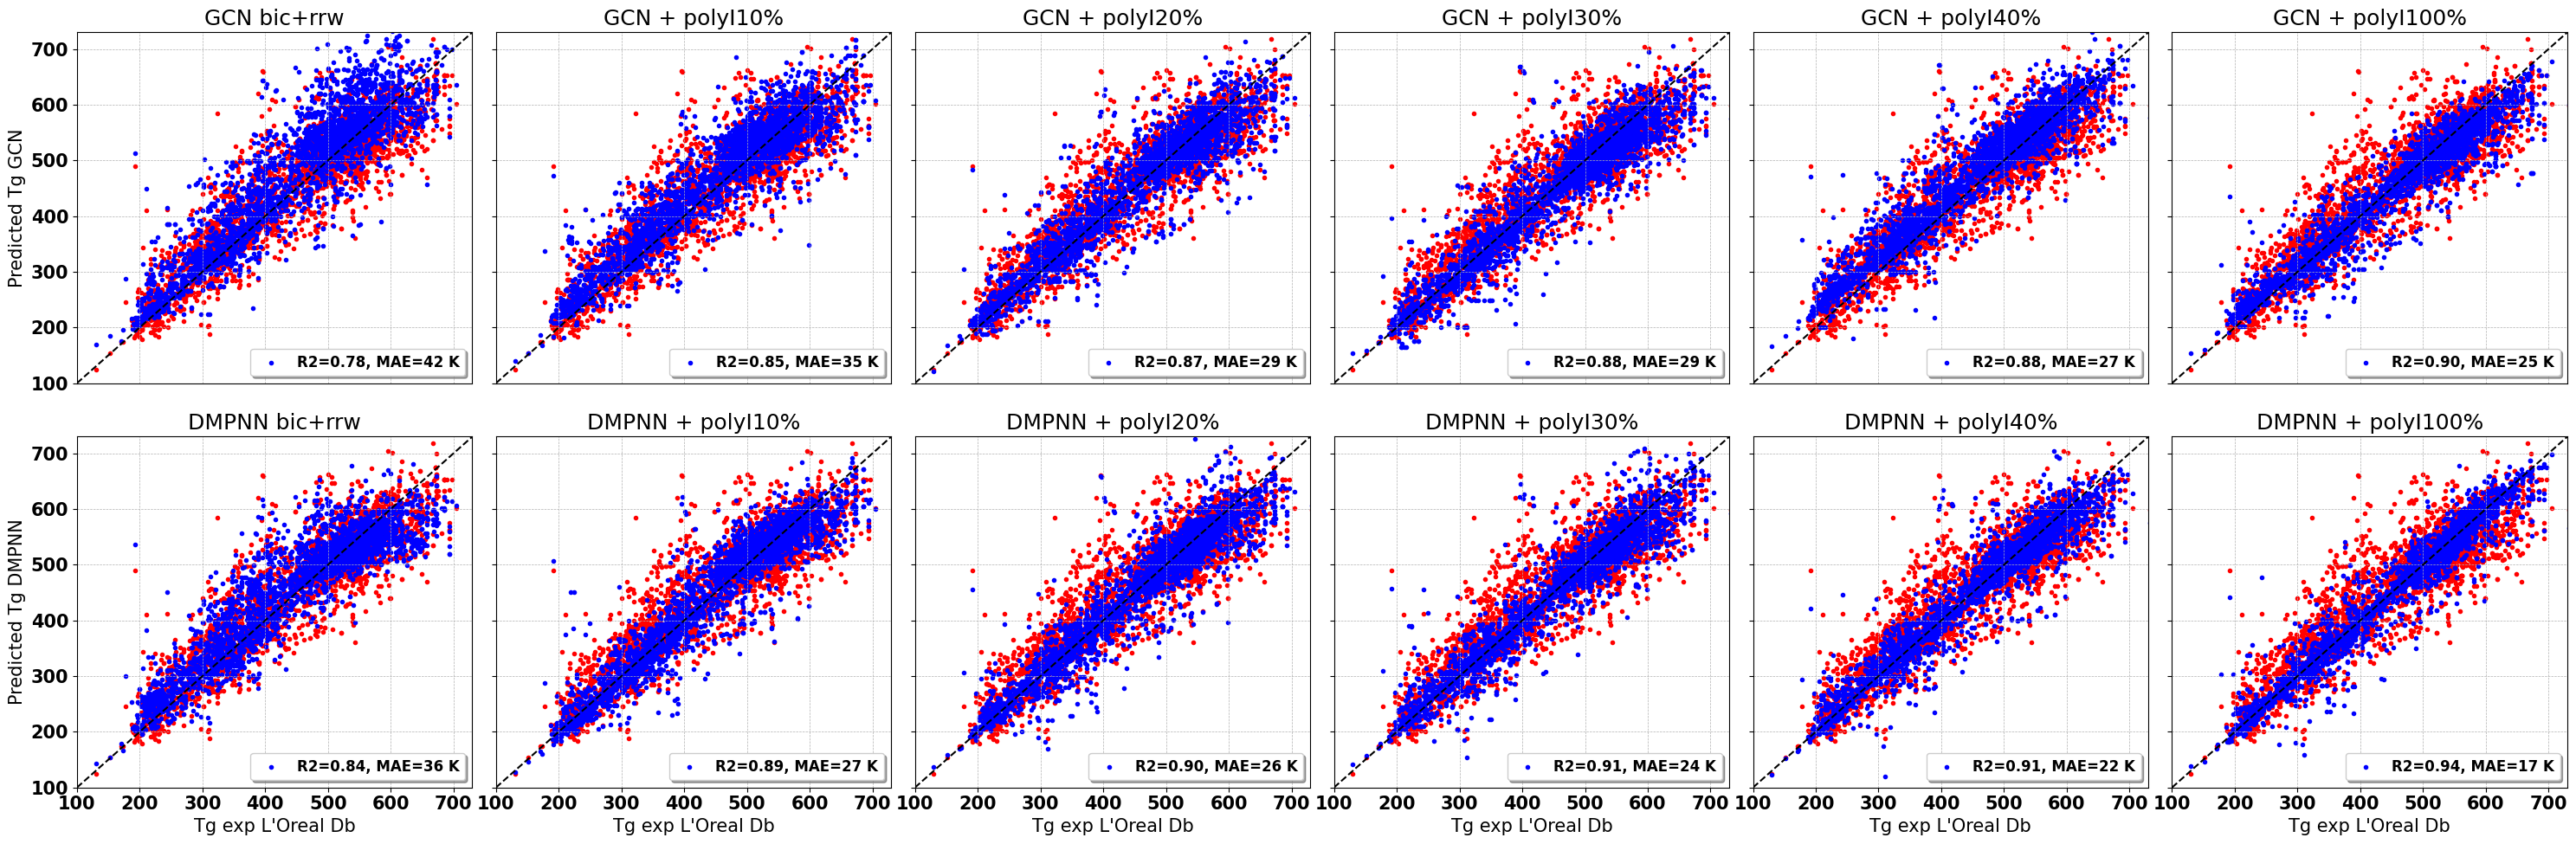

In [ ]:
import matplotlib.pyplot as plt

# Set the font properties globally
font = {'family': 'normal', 'weight': 'bold', 'size': 15}
plt.rc('font', **font)

# Create the figure and subplots with shared y-axis per row
fig, ax = plt.subplots(2, 6, figsize=(30, 10), sharey='row')

# Set common axis limits
x_lim = [100, 730]
y_lim_gcn = [100, 730]  # Limits for the first row (GCN)
y_lim_dmpnn = [100, 730]  # Limits for the second row (DMPNN)

# First row (GCN-based predictions)
for i in range(6):
    ax[0, i].plot(x_lim, x_lim, color='black', linestyle='--')
    ax[0, i].scatter(y_Big_Db, P3C_Big_Db, color='red', marker='.')
    ax[0, i].set_xlim(x_lim)
    ax[0, i].set_ylim(y_lim_gcn)
    ax[0, i].grid(True, which='both', linestyle='--', linewidth=0.5)
    ax[0, i].tick_params(axis='x', which='both', bottom=False, labelbottom=False)  # Hide x-ticks for the first row

# Individual settings for each GCN plot
ax[0, 0].scatter(y_Big_Db, Big_Db_prediction_GCN_bic_rereview, label='R2=0.78, MAE=42 K', color='blue', marker='.')
ax[0, 0].set_title('GCN bic+rrw')
ax[0, 1].scatter(y_Big_Db, Big_Db_prediction_GCN_bic_rereview_polyinfo10, label='R2=0.85, MAE=35 K', color='blue', marker='.')
ax[0, 1].set_title('GCN + polyI10%')
ax[0, 2].scatter(y_Big_Db, Big_Db_prediction_GCN_bic_rereview_polyinfo20, label='R2=0.87, MAE=29 K', color='blue', marker='.')
ax[0, 2].set_title('GCN + polyI20%')
ax[0, 3].scatter(y_Big_Db, Big_Db_prediction_GCN_bic_rereview_polyinfo30, label='R2=0.88, MAE=29 K', color='blue', marker='.')
ax[0, 3].set_title('GCN + polyI30%')
ax[0, 4].scatter(y_Big_Db, Big_Db_prediction_GCN_bic_rereview_polyinfo40, label='R2=0.88, MAE=27 K', color='blue', marker='.')
ax[0, 4].set_title('GCN + polyI40%')
ax[0, 5].scatter(y_Big_Db, Big_Db_prediction_GCN_bic_rereview_polyinfo100, label='R2=0.90, MAE=25 K', color='blue', marker='.')
ax[0, 5].set_title('GCN + polyI100%')

# Second row (DMPNN-based predictions)
for i in range(6):
    ax[1, i].plot(x_lim, x_lim, color='black', linestyle='--')
    ax[1, i].scatter(y_Big_Db, P3C_Big_Db, color='red', marker='.')
    ax[1, i].set_xlim(x_lim)
    ax[1, i].set_ylim(y_lim_dmpnn)
    ax[1, i].grid(True, which='both', linestyle='--', linewidth=0.5)

# Individual settings for each DMPNN plot
ax[1, 0].scatter(y_Big_Db, Big_Db_prediction_dmpnn_bic_rereview, label='R2=0.84, MAE=36 K', color='blue', marker='.')
ax[1, 0].set_title('DMPNN bic+rrw')
ax[1, 1].scatter(y_Big_Db, Big_Db_prediction_dmpnn_bic_rereview_polyinfo10, label='R2=0.89, MAE=27 K', color='blue', marker='.')
ax[1, 1].set_title('DMPNN + polyI10%')
ax[1, 2].scatter(y_Big_Db, Big_Db_prediction_dmpnn_bic_rereview_polyinfo20, label='R2=0.90, MAE=26 K', color='blue', marker='.')
ax[1, 2].set_title('DMPNN + polyI20%')
ax[1, 3].scatter(y_Big_Db, Big_Db_prediction_dmpnn_bic_rereview_polyinfo30, label='R2=0.91, MAE=24 K', color='blue', marker='.')
ax[1, 3].set_title('DMPNN + polyI30%')
ax[1, 4].scatter(y_Big_Db, Big_Db_prediction_dmpnn_bic_rereview_polyinfo40, label='R2=0.91, MAE=22 K', color='blue', marker='.')
ax[1, 4].set_title('DMPNN + polyI40%')
ax[1, 5].scatter(y_Big_Db, Big_Db_prediction_dmpnn_bic_rereview_polyinfo100, label='R2=0.94, MAE=17 K', color='blue', marker='.')
ax[1, 5].set_title('DMPNN + polyI100%')

# Set common axis labels for the entire figure
for i in range(6):
    ax[1, i].set_xlabel('Tg exp L\'Oreal Db')

# Set shared y-label only on the first subplot in each row
ax[0, 0].set_ylabel('Predicted Tg GCN')
ax[1, 0].set_ylabel('Predicted Tg DMPNN')

# Adding a legend for each subplot
for i in range(2):
    for j in range(6):
        ax[i, j].legend(loc='lower right', shadow=True, fontsize=12)

# Adjust subplot spacing and remove horizontal gaps
plt.subplots_adjust(wspace=0.0, hspace=0.2)

# Tight layout for better spacing
plt.tight_layout()
plt.show()


In [ ]:
MAE_GCN[5]=27
r2_GCN[5]=0.88

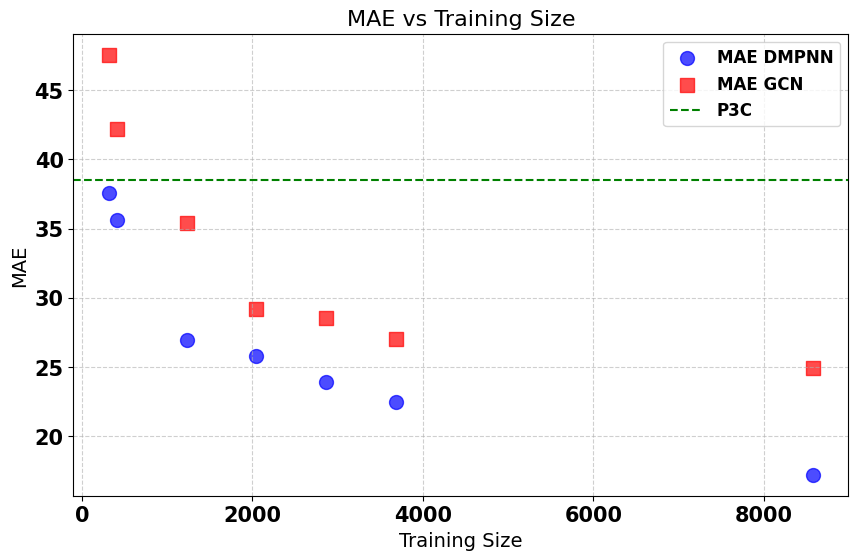

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Scatter plot for MAE_dmpnn
ax1.scatter(size_training_DB[0:6] + [size_training_DB[-1]],
            MAE_dmpnn,
            s=100,
            c='blue',
            marker='o',
            alpha=0.7,
            label='MAE DMPNN')

# Scatter plot for MAE_GCN
ax1.scatter(size_training_DB[0:6] + [size_training_DB[-1]],
            MAE_GCN,
            s=100,
            c='red',
            marker='s',
            alpha=0.7,
            label='MAE GCN')

# Add horizontal line
ax1.axhline(y=38.47, color='green', linestyle='--', label='P3C')

# Customize the plot
plt.xlabel('Training Size', fontsize=14)
plt.ylabel('MAE', fontsize=14)
plt.title('MAE vs Training Size', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)

plt.show()

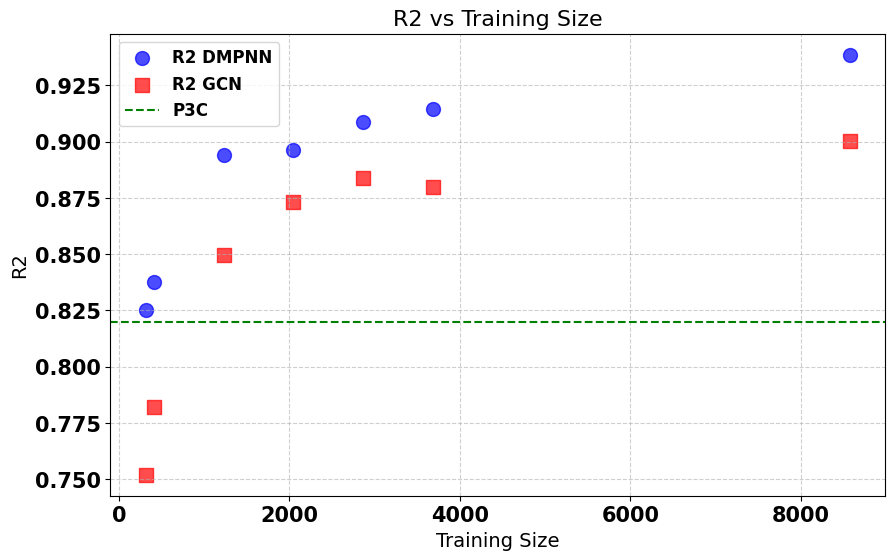

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Scatter plot for r2_dmpnn
ax1.scatter(size_training_DB[0:6] + [size_training_DB[-1]],
            r2_dmpnn,
            s=100,
            c='blue',
            marker='o',
            alpha=0.7,
            label='R2 DMPNN')

# Scatter plot for r2_GCN
ax1.scatter(size_training_DB[0:6] + [size_training_DB[-1]],
            r2_GCN,
            s=100,
            c='red',
            marker='s',
            alpha=0.7,
            label='R2 GCN')

# Add horizontal line
ax1.axhline(y=0.82, color='green', linestyle='--', label='P3C')

# Customize the plot
plt.xlabel('Training Size', fontsize=14)
plt.ylabel('R2', fontsize=14)
plt.title('R2 vs Training Size', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)

plt.show()